# PROJET 10 : Détectez des faux billets avec R ou Python 

### I- IMPORTATION DES LIBRAIRIES ET DONNEES

In [863]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [864]:
from warnings import filterwarnings
filterwarnings('ignore') 

- DIMENSIONS GEOMETRIQUE 

Nous disposons actuellement de six informations géométriques sur un
billet :

● length : la longueur du billet (en mm) ;

● height_left : la hauteur du billet (mesurée sur le côté gauche, en mm) ;

● height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;

● margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;

● margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;

● diagonal : la diagonale du billet (en mm). 

● is_genuine : si le billet est autentique ou pas ;

Ces informations sont celles avec lesquelles l’algorithme devra opérer.

In [865]:
nom_fichier = "billets.csv"

# Importer le fichier CSV dans un dataframe

df_billets = pd.read_csv(nom_fichier, delimiter=';')

# Effectuer des opérations sur le dataframe
# Par exemple, afficher les premières lignes du dataframe

df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [866]:
df_billets.shape

(1500, 7)

In [867]:
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [868]:
df_billets.isna().mean()

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      0.024667
margin_up       0.000000
length          0.000000
dtype: float64

In [869]:
df_billets.duplicated().sum()

0

In [870]:
df_billets.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [871]:
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [872]:
# Suppresion des valeurs nulles

df_billets_sans_na = df_billets.dropna()

In [873]:
df_billets_sans_na

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


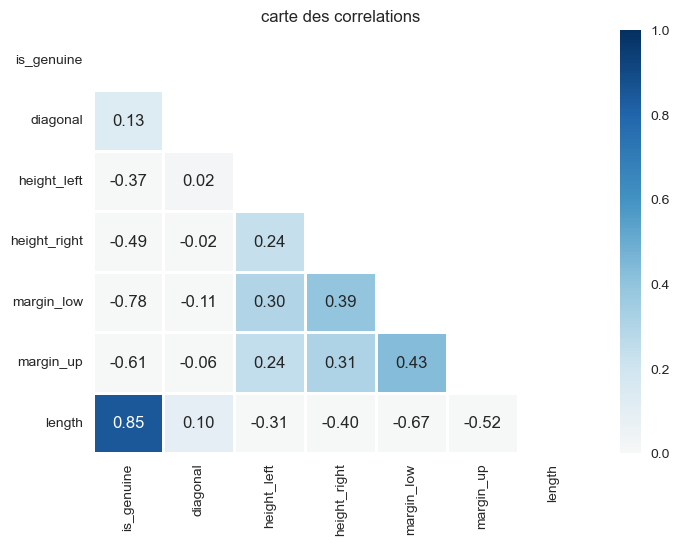

In [874]:
# CARTE DE CORRELATION AMELIOREE  

mask = np.triu(np.ones_like(df_billets_sans_na.corr(), dtype='bool'))
sns.heatmap(df_billets_sans_na.corr(), mask=mask, center=0,
            cmap="RdBu", linewidths=1,
            annot=True, fmt=".2f", vmin=0, vmax=1)
plt.title("carte des correlations")
plt.show()

### 1- REGRESSION LINEAIRE

### 1a- Retirons les variables non significatives

In [875]:
reg_multi = smf.ols('margin_low~height_left+height_right+length+margin_up+is_genuine+diagonal', data=df_billets_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          4.75e-299
Time:                        10:09:21   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

In [876]:
reg_multi = smf.ols('margin_low~margin_up+is_genuine', data=df_billets_sans_na).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.24e-304
Time:                        10:09:21   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

On remarque qu'à présent, tous les paramètres sont significatifs. Quant au 𝑅2 , il vaut environ 0.61, tout comme le 𝑅2 ajusté.

On peut donc utiliser ce modèle à des fins de prévision !

### 1b- Testons la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

En résumé, le test de normalité de Shapiro-Wilk est approprié pour vérifier si les données suivent une distribution
normale, lorsque les données sont continues, indépendantes, non biaisées, de petite à moyenne taille et sans valeurs
aberrantes. Si ces critères ne sont pas satisfaits, d'autres tests de normalité peuvent être plus appropriés ou une
transformation des données peut être nécessaire pour répondre à la question de recherche.

In [877]:
# les residus

residuals = reg_multi.resid

In [878]:
# teste de shapiro-wilk

shapiro(residuals)

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

Ici, l'hypothèse de normalité n'est pas remise en cause (p-value = 6.209 > 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.

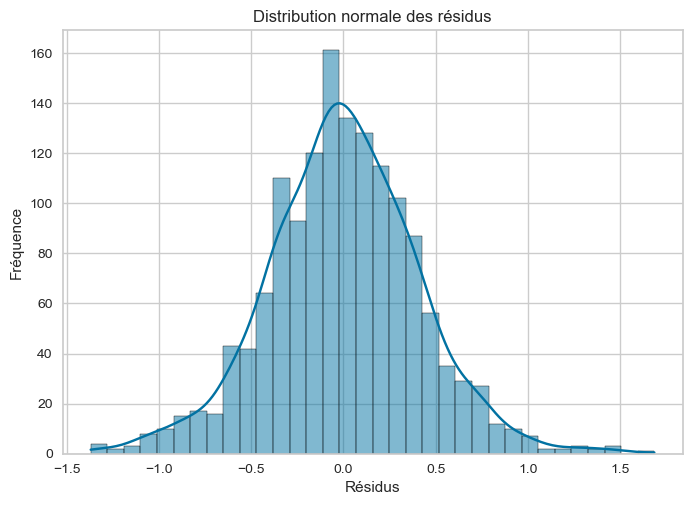

In [879]:
# Ddistibution des résidus

sns.histplot(residuals, kde=True)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution normale des résidus')
plt.show()

la distribution des résidus est Symetrique comme une cloche, elle suit la loi de gausse ou la loi normale. la mediane est confondu à la moyenne, donc parfaitemnet symetrique.

### 1c- Vérifions la colinéarité des variables

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [880]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007748]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

### 1d- Testons l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [881]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residuals, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.203355911584878e-36


La p-valeur ici n'est pas inférieure à 5 %, on ne rejette pas l'hypothèse 𝐻0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

Si l'on souhaite prévoir l'autentisité des billets, sachant que la marge entre le bord superieur du billet et l'image de celui-ci est de 2.89mm, alors on saisit les lignes suivantes :

In [882]:
a_prevoir = pd.DataFrame({'is_genuine': 1, 'margin_up': 2.89}, index=[0])
is_genuine_prev = reg_multi.predict(a_prevoir)
print(round(is_genuine_prev[0], 2))

4.15


On obtient une autentisité de la longueur de 4.15

In [883]:
# Predire les valeurs manquantes de la variable "margin_low"

df_predict = df_billets[df_billets.margin_low.isna()]

In [884]:
is_genuine_prev = reg_multi.predict(df_predict[['is_genuine', 'margin_up']])

In [885]:
is_genuine_prev

72      4.074248
99      4.097561
151     4.122994
197     3.995830
241     4.122994
251     4.137830
284     4.078487
334     4.127233
410     4.101800
413     4.093322
445     4.125114
481     4.188696
505     4.131472
611     4.063651
654     4.190815
675     4.220487
710     4.112397
739     4.108158
742     4.076367
780     4.099681
798     4.125114
844     4.129352
845     4.148427
871     4.112397
895     4.131472
919     4.216248
945     4.122994
946     4.070009
981     4.129352
1076    5.245925
1121    5.254403
1176    5.286194
1303    5.305269
1315    5.205657
1347    5.161149
1435    5.171746
1438    5.239567
dtype: float64

In [886]:
df_predict

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [887]:
# Remplaçons les valeurs NaN de la variable margin_low par is_genuine_prev

df_predict['margin_low']=is_genuine_prev

In [888]:
df_predict

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.074248,3.25,112.79
99,True,171.93,104.07,104.18,4.097561,3.14,113.08
151,True,172.07,103.80,104.38,4.122994,3.02,112.93
197,True,171.45,103.66,103.80,3.995830,3.62,113.27
241,True,171.83,104.14,104.06,4.122994,3.02,112.36
251,True,171.80,103.26,102.82,4.137830,2.95,113.22
284,True,171.92,103.83,103.76,4.078487,3.23,113.29
334,True,171.85,103.70,103.96,4.127233,3.00,113.36
410,True,172.56,103.72,103.51,4.101800,3.12,112.95
413,True,172.30,103.66,103.50,4.093322,3.16,112.95


In [889]:
# Concatenons les Dataframe df_billets_sans_na et df_predict

df_complete = pd.concat([df_billets_sans_na,df_predict])

In [890]:
df_complete

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.520000,2.89,112.83
1,True,171.46,103.36,103.66,3.770000,2.99,113.09
2,True,172.69,104.48,103.50,4.400000,2.94,113.16
3,True,171.36,103.91,103.94,3.620000,3.01,113.51
4,True,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.305269,2.93,111.21
1315,False,172.08,104.15,104.17,5.205657,3.40,112.29
1347,False,171.72,104.46,104.12,5.161149,3.61,110.31
1435,False,172.66,104.33,104.41,5.171746,3.56,111.47


In [891]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


### 2- REGRESSION LOGISTIQUE

In [892]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [893]:
df_complete.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [894]:
df_complete_log = df_complete.copy()

In [895]:
df_complete_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


In [896]:
# Changeons le type de la variable is_gennuine en "int"

df_complete_log['is_genuine'] = df_complete_log['is_genuine'].map(int)

In [897]:
df_complete_log

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.520000,2.89,112.83
1,1,171.46,103.36,103.66,3.770000,2.99,113.09
2,1,172.69,104.48,103.50,4.400000,2.94,113.16
3,1,171.36,103.91,103.94,3.620000,3.01,113.51
4,1,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1303,0,172.17,104.49,103.76,5.305269,2.93,111.21
1315,0,172.08,104.15,104.17,5.205657,3.40,112.29
1347,0,171.72,104.46,104.12,5.161149,3.61,110.31
1435,0,172.66,104.33,104.41,5.171746,3.56,111.47


In [898]:
df_complete_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 93.8 KB


### 2a- Preparons les données dans le train et le test


commencons par séparer nos données en un ensemble de formation et un ensemble de tests

#### Train Test Split ( séparons nos données en train et test )

In [899]:
# Séparons les données en variable indépendante (X) et variable dépendante (Y)

X = df_complete_log.drop('is_genuine', axis=1)
Y = df_complete_log['is_genuine']

In [900]:
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.520000,2.89,112.83
1,171.46,103.36,103.66,3.770000,2.99,113.09
2,172.69,104.48,103.50,4.400000,2.94,113.16
3,171.36,103.91,103.94,3.620000,3.01,113.51
4,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...
1303,172.17,104.49,103.76,5.305269,2.93,111.21
1315,172.08,104.15,104.17,5.205657,3.40,112.29
1347,171.72,104.46,104.12,5.161149,3.61,110.31
1435,172.66,104.33,104.41,5.171746,3.56,111.47


In [901]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1303    0
1315    0
1347    0
1435    0
1438    0
Name: is_genuine, Length: 1500, dtype: int64

In [902]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

# Pour les X on prends toute la base de données sauf le "is_genuine" qui represente le y
# Axis=1 c'est pour preciser que c'est la colonne "is_genuine"
# test_size=0.30 pour dire le Test est de 30% et le Train est de 70%

In [903]:
print(x_train)

      diagonal  height_left  height_right  margin_low  margin_up  length
748     171.99       103.91        103.79        4.05       3.11  113.67
523     172.13       103.57        103.80        4.40       3.16  113.75
102     172.05       103.69        103.89        4.42       3.15  112.67
1084    171.94       104.27        103.94        4.46       3.14  112.13
1085    171.39       103.51        103.50        5.52       3.45  111.54
...        ...          ...           ...         ...        ...     ...
1454    172.20       104.56        103.58        5.19       3.62  111.17
76      171.65       103.30        103.55        4.14       3.37  112.87
613     172.45       104.52        103.72        4.12       3.34  113.06
1396    171.91       104.53        104.23        4.75       3.34  112.28
887     172.08       104.04        104.08        3.66       3.30  113.41

[1050 rows x 6 columns]


In [904]:
log_scaler = StandardScaler()

In [905]:
log_scaler.fit(x_train)

StandardScaler()

In [906]:
x_train_scaled = log_scaler.transform(x_train)

In [907]:
x_test_scaled = log_scaler.transform(x_test)

In [908]:
# On crée notre modele qu'on va mettre dans logmodel
# On prend aussi le solver qui est une ligne lineaire

logmodel = LogisticRegression(solver='liblinear')

### 2b- Entrainer le modele (Train the model)

In [909]:
logmodel.fit(x_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [910]:
# Pour évaluer le modele on va faire un .predict() avec que les x_test

predictions = logmodel.predict(x_test_scaled)

Passons à l'evaluation de notre modele

### 2c- Evaluation du modele

In [911]:
# Et maintenant on va comparer les predictions obtenues avec les y_test qui est la vrai valeur
# si le billet est autentique ou non

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       143
           1       0.99      1.00      1.00       307

    accuracy                           1.00       450
   macro avg       1.00      0.99      0.99       450
weighted avg       1.00      1.00      1.00       450



On observe la precision, le recall, le f1-score et le support

accuracy est de 100% ce qui signifie le modele est trop elevé

Le rapport de classification indique une performance exceptionnelle de notre modèle. Avec une exactitude (accuracy) de 1.00, notre modèle a prédit toutes les instances de manière correcte sur les données de test. Cela suggère une capacité élevée à généraliser et à distinguer les différentes classes.

In [912]:
from sklearn.metrics import confusion_matrix

print('confusion_martix:\n', confusion_matrix(y_test, predictions))

confusion_martix:
 [[141   2]
 [  0 307]]


On obtient la martix de confusion, 

Cette matrice de confusion est organisée en quatre quadrants. Les éléments sur la diagonale principale indiquent le nombre de prédictions correctes pour chaque classe. Dans ce cas, il y a eu 141 prédictions correctes pour la classe 0 et 307 prédictions correctes pour la classe 1.

Les deux éléments hors de la diagonale principale représentent les erreurs de classification. En l'occurrence, il y a eu 2 erreurs de classification où des exemples de la classe 0 ont été prédits comme appartenant à la classe 1, et il n'y a eu aucune erreur de classification où des exemples de la classe 1 ont été prédits comme appartenant à la classe 0.

Cette matrice de confusion permet d'évaluer la performance globale du modèle de classification en fournissant des informations sur les faux positifs, les faux négatifs et les prédictions correctes.

### 2d- La courbe roc

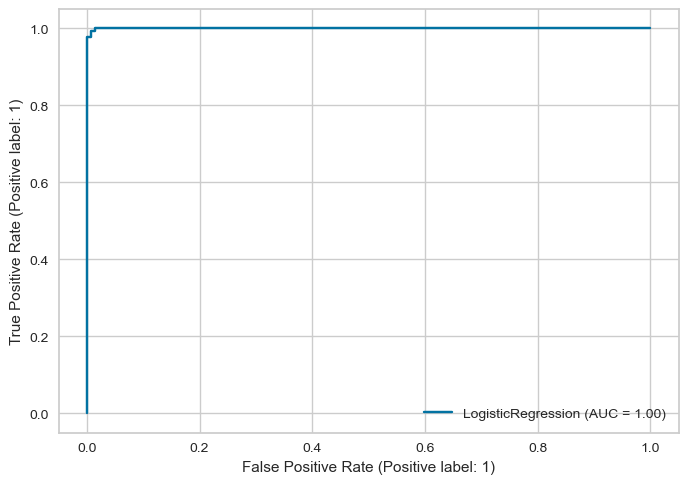

In [913]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logmodel, x_test_scaled, y_test)
plt.show()

La courbe ROC représente la performance d'un modèle de classification binaire. Elle est tracée en utilisant les taux de faux positifs (FPR) sur l'axe des abscisses et les taux de vrais positifs (TPR) sur l'axe des ordonnées. Plus la courbe ROC est proche du coin supérieur gauche, meilleure est la performance du modèle. L'aire sous la courbe (AUC) est une mesure de la performance globale du modèle, où une valeur de 1 représente une performance parfaite et une valeur de 0.5 indique un modèle avec une performance aléatoire.

### 3- ACP ET K-MEANS 

In [914]:
from scipy import stats
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn. decomposition import PCA, KernelPCA
from sklearn. preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [915]:
df_complete.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [916]:
# Normalisons notre Dataframe

from sklearn.preprocessing import MinMaxScaler

df_test = df_complete.copy()
list_col = df_test.columns[0:-1]

scaler = MinMaxScaler()

df_test[list_col] = scaler.fit_transform(df_test[list_col])

In [917]:
df_test

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,0.390863,0.988506,1.000000,0.392857,0.378049,112.83
1,1.0,0.213198,0.126437,0.394366,0.201531,0.439024,113.09
2,1.0,0.837563,0.770115,0.319249,0.362245,0.408537,113.16
3,1.0,0.162437,0.442529,0.525822,0.163265,0.451220,113.51
4,1.0,0.350254,0.655172,0.300469,0.270408,0.737805,112.54
...,...,...,...,...,...,...,...
1303,0.0,0.573604,0.775862,0.441315,0.593181,0.402439,111.21
1315,0.0,0.527919,0.580460,0.633803,0.567770,0.689024,112.29
1347,0.0,0.345178,0.758621,0.610329,0.556416,0.817073,110.31
1435,0.0,0.822335,0.683908,0.746479,0.559119,0.786585,111.47


Nous allons sélectionner d'abord que certaines colones :

In [918]:
cols = ["diagonal","height_left","height_right","margin_low","margin_up","length"]

In [919]:
df_test = df_test[cols]
df_test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.390863,0.988506,1.000000,0.392857,0.378049,112.83
1,0.213198,0.126437,0.394366,0.201531,0.439024,113.09
2,0.837563,0.770115,0.319249,0.362245,0.408537,113.16
3,0.162437,0.442529,0.525822,0.163265,0.451220,113.51
4,0.350254,0.655172,0.300469,0.270408,0.737805,112.54


### 3a- commencons notre ACP, ou notre PCA

In [920]:
# Commençons par scaler les données. On instancie 

X = df_test.values
X[:5]

array([[  0.39086294,   0.98850575,   1.        ,   0.39285714,
          0.37804878, 112.83      ],
       [  0.21319797,   0.12643678,   0.3943662 ,   0.20153061,
          0.43902439, 113.09      ],
       [  0.83756345,   0.77011494,   0.31924883,   0.3622449 ,
          0.40853659, 113.16      ],
       [  0.16243655,   0.44252874,   0.5258216 ,   0.16326531,
          0.45121951, 113.51      ],
       [  0.35025381,   0.65517241,   0.30046948,   0.27040816,
          0.73780488, 112.54      ]])

In [921]:
type(X)

numpy.ndarray

In [922]:
X.shape

(1500, 6)

In [923]:
# Stockage des noms des colonnes dans une liste

features = df_test.columns.tolist()
features

# Ici nous avons ajouter la methode .tolist() pour obtenir notre liste

['diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [924]:
scaler = StandardScaler()

In [925]:
# On fit (entraine) :

scaler.fit(X)

StandardScaler()

In [926]:
# On transforme

X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.48653957,  2.77412327,  3.16324041,  0.0562999 , -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08070259, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.1256205 , -0.91256208,
         0.55190114],
       [-1.96149786, -0.39929381,  0.06049835, -1.30810309, -0.61049399,
         0.95307539],
       [-0.74875438,  0.83666863, -1.41407214, -0.67138169,  1.41767746,
        -0.15875038]])

In [927]:
# Rappelons qu'on peut faire les 2 opérations en une seule :

X_scaled = scaler.fit_transform(X)

In [928]:
# On espère avoir une moyenne à 0 et un écart type à 1 :

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,-0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


### 3b- PCA

In [929]:
# Nous allons travailler que sur les 6 premières composantes :

n_components = 6

In [930]:
# On instancie notre ACP :

pca = PCA(n_components=n_components)

In [931]:
# On l'entraine sur les données scalées :

pca.fit(X_scaled)

PCA(n_components=6)

Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

In [932]:
pca.explained_variance_ratio_

array([0.43204935, 0.16957137, 0.13019944, 0.11825183, 0.09666912,
       0.0532589 ])

ci la 1ère composante capte 43% de la variance de nos données initiales, la 2ème 16% etc etc.

In [933]:
# Enregistrons cela dans une variable :

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.2 , 16.96, 13.02, 11.83,  9.67,  5.33])

Les 2 premières composantes captent donc 43+16 = 59% de la variance, les 3 premières 49+14+13 = 72% de la variance etc etc.

Dans le jargon, cela s'appelle une somme cumulée. Et pour faire une somme cumulée numpy dispose de la fonction cumsum :

In [934]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

In [935]:
# Définisons ensuite une variable avec la liste de nos composantes :

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

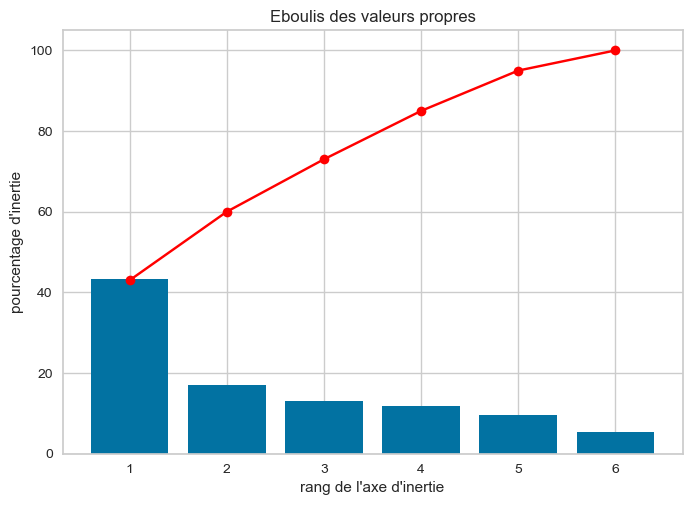

In [936]:
# On peut enfin l'afficher de façon graphique :

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

### 3c- Composantes

Intéressons nous maintenant à nos fameuses composantes.

La formule de calcul de composantes nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :

In [937]:
pcs = pca.components_
pcs

array([[-0.08483969,  0.33133251,  0.39376123,  0.50658472,  0.43931716,
        -0.52758454],
       [ 0.94130571,  0.30725488,  0.10859729, -0.07316255, -0.00442827,
         0.04870577],
       [-0.28703124,  0.88479214, -0.16571532, -0.10699285, -0.2709382 ,
         0.14979785],
       [-0.10282238, -0.047614  ,  0.86685207, -0.09139172, -0.44267713,
         0.17723563],
       [-0.11716078,  0.10320227,  0.23290013, -0.57099545,  0.71051535,
         0.30085264],
       [ 0.00773041,  0.00618687,  0.0047098 ,  0.62624552,  0.18104754,
         0.75823355]])

Affichons la même chose mais version pandas :

In [938]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,-0.084840,0.331333,0.393761,0.506585,0.439317,-0.527585
1,0.941306,0.307255,0.108597,-0.073163,-0.004428,0.048706
2,-0.287031,0.884792,-0.165715,-0.106993,-0.270938,0.149798
3,-0.102822,-0.047614,0.866852,-0.091392,-0.442677,0.177236
4,-0.117161,0.103202,0.232900,-0.570995,0.710515,0.300853
5,0.007730,0.006187,0.004710,0.626246,0.181048,0.758234


Intéressant... Mais pas encore très clair... Continuons le travail :

In [939]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05
F3,-0.29,0.88,-0.17,-0.11,-0.27,0.15
F4,-0.10,-0.05,0.87,-0.09,-0.44,0.18
F5,-0.12,0.10,0.23,-0.57,0.71,0.30
F6,0.01,0.01,0.00,0.63,0.18,0.76


De mieux en mieux !

"ATTENTION" : Nous avons arrondi les résultats pour simplifier l'analyse

Alors, comment calcule t-on la première composante F1 ?

et bien c'est assez simple :

F1 = (-0.08	 * proba_authenticite) + (0.33 * proba_authenticite) + ... + (-0.53 * margin_low)

et F2 ?

F2 = 0.94 * proba_authenticite) + (0.31 * proba_authenticite) + ... + (0.05 * margin_low)

...

Dans certains cas, on voudra afficher ce dataframe comme cela :

In [940]:
pcs.T

,F1,F2,F3,F4,F5,F6
diagonal,-0.084840,0.941306,-0.287031,-0.102822,-0.117161,0.007730
height_left,0.331333,0.307255,0.884792,-0.047614,0.103202,0.006187
height_right,0.393761,0.108597,-0.165715,0.866852,0.232900,0.004710
margin_low,0.506585,-0.073163,-0.106993,-0.091392,-0.570995,0.626246
margin_up,0.439317,-0.004428,-0.270938,-0.442677,0.710515,0.181048
length,-0.527585,0.048706,0.149798,0.177236,0.300853,0.758234


Et pour une représentation plus visuelle, comme cela :

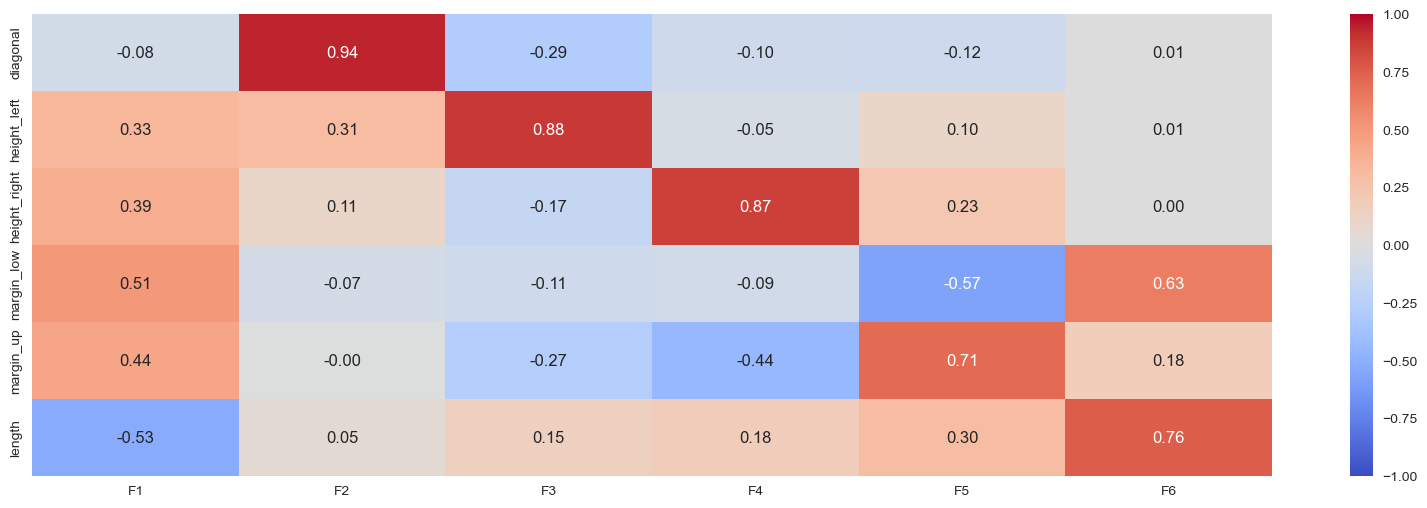

In [941]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f");

### 3d- Graphique de Correlation


Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :

In [942]:
x, y = 0,1

Pour la partie graphique :

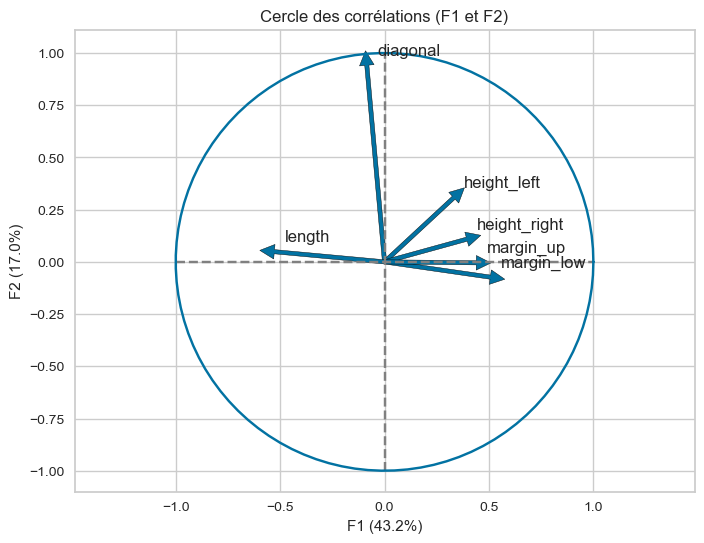

In [943]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir que les variables "diagonal" est fortement corrélées négativement avec la première composante principale (PC1).

Les variables "length", "height_left", "height_right", "margin_up" et "margin_low" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

On peut en faire une fonction :

In [944]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Essayons cette fonction pour F1 et F2

"ATTENTION" Encore une fois Pour F1 et F2 il faut bien préciser 0 et 1

In [945]:
x_y = (0,1)
x_y

(0, 1)

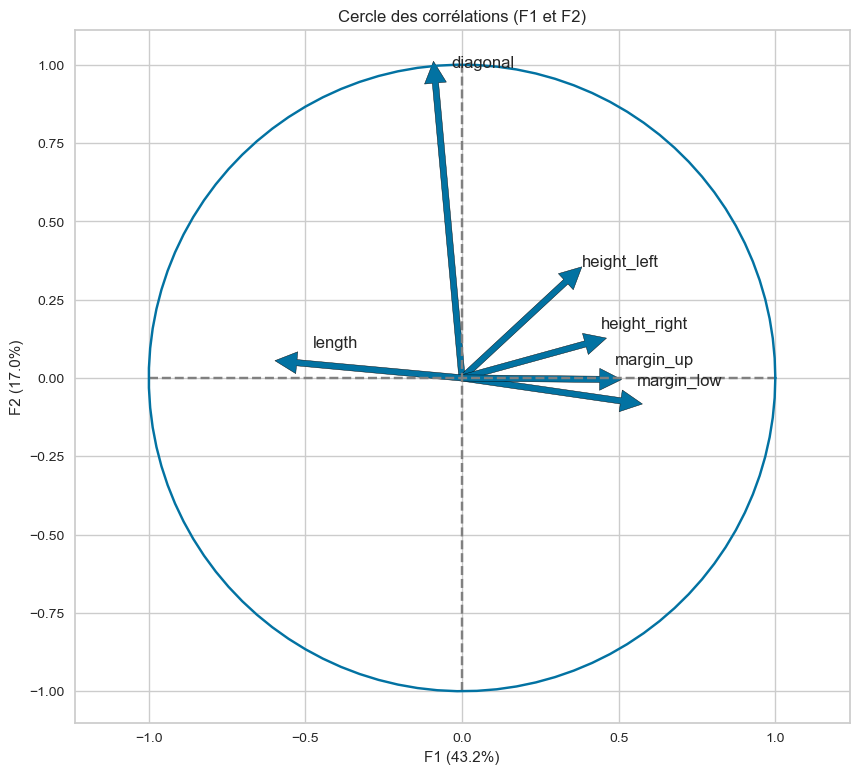

In [946]:
correlation_graph(pca, x_y, features);

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir que la variable "diagonal" est fortement corrélée négativement avec la deuxième composante principale (PC2).

Les variables "length", "height_left", "height_right", "margin_up" et "margin_low" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

Essayons pour F3 et F4 :

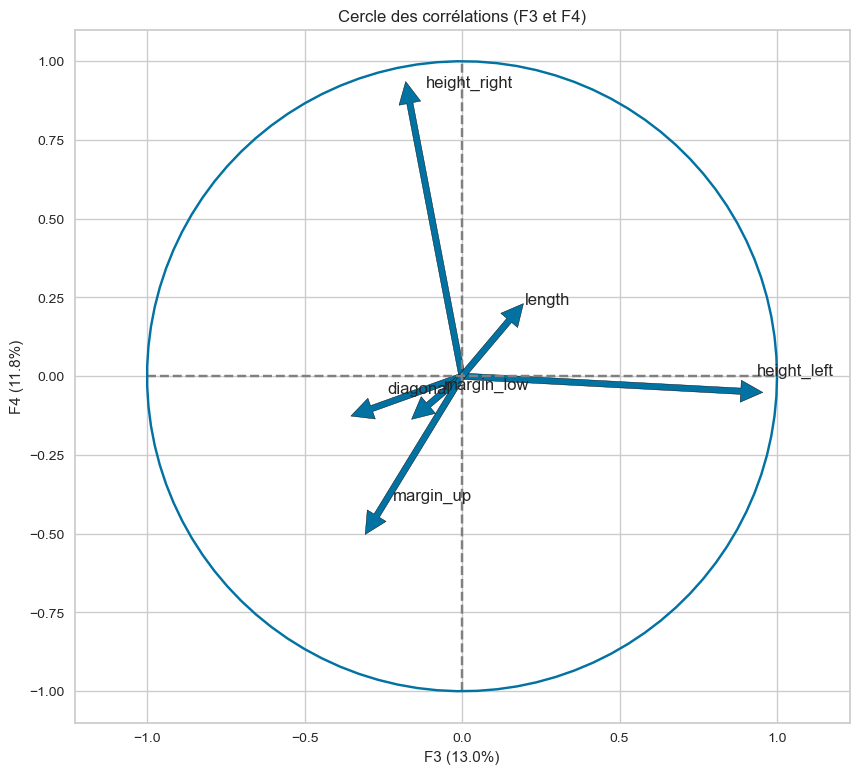

In [947]:
correlation_graph(pca, (2,3), features)

# Essayons avec F3 et F4 :

# x_y = 1,2

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir que la variable "height_left" est fortement corrélée positivement avec la troisième composante principale (PC3). Tandis que la variable "height_right" est fortement corrélée negativement avec la quatrième composante principale (PC4).

Les variables "length", "diagonal", "margin_up" et "margin_low" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

Essayons pour F5 et F6 :

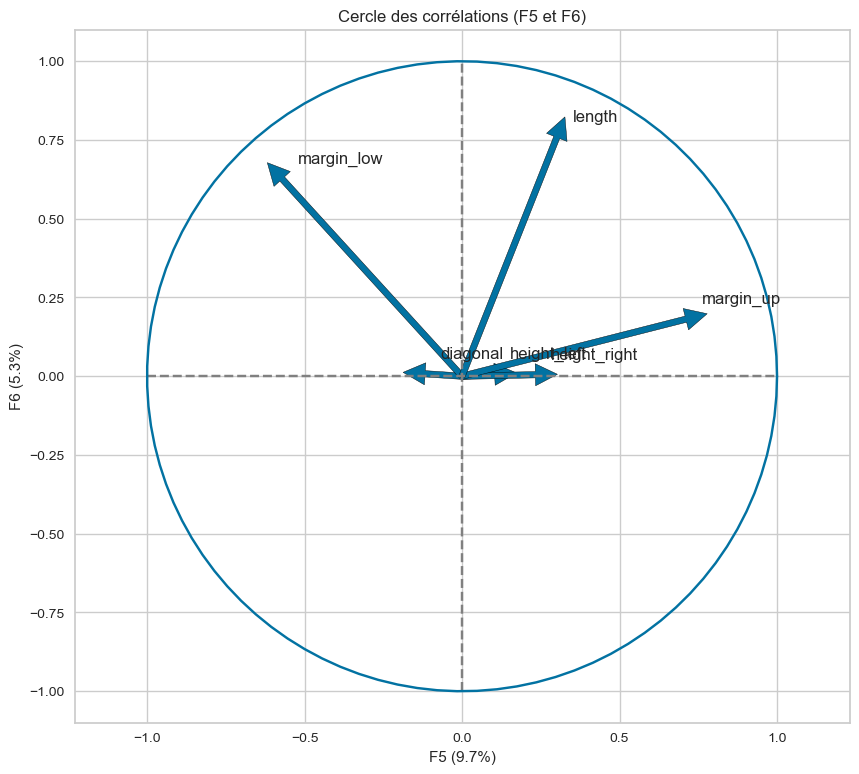

In [948]:
correlation_graph(pca, (4,5), features)

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir que la variable "margin_low" et "length" sont fortement corrélées avec la sixième composante principale (PC6). Par ailleurs, la variable "margin_low" qui a la direction de sa flèche pointé vers la gauche du centre du cercle, donc négativement corrélée à la composante (PC6). Tandis que la variable "margin_up" est fortement corrélée positivement avec la cinquième composante principale (PC5).

Les variables "height_left", "height_right" et "diagonal" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

### 3e- Projection

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [949]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 1.64720899,  0.74723508,  2.39567235,  3.18511705,  0.29842245,
        -0.00905458],
       [-2.01973701, -2.20674148, -1.00234872,  0.07210107,  0.03824257,
        -0.47553854],
       [-0.96899302,  2.61932122,  1.20047867, -0.92420161, -0.83697488,
         0.19634821],
       [-1.37575762, -1.81765631,  0.6478261 ,  0.83186142,  0.80258347,
        -0.22441702],
       [ 0.1503854 , -0.56619059,  0.85347673, -1.78299067,  1.18761019,
        -0.29142444]])

In [950]:
# rappelons que :

x_y

(0, 1)

In [951]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

Essayons la version simple avec F1 et F2, les couleurs correspondent au niveau de difficulté :

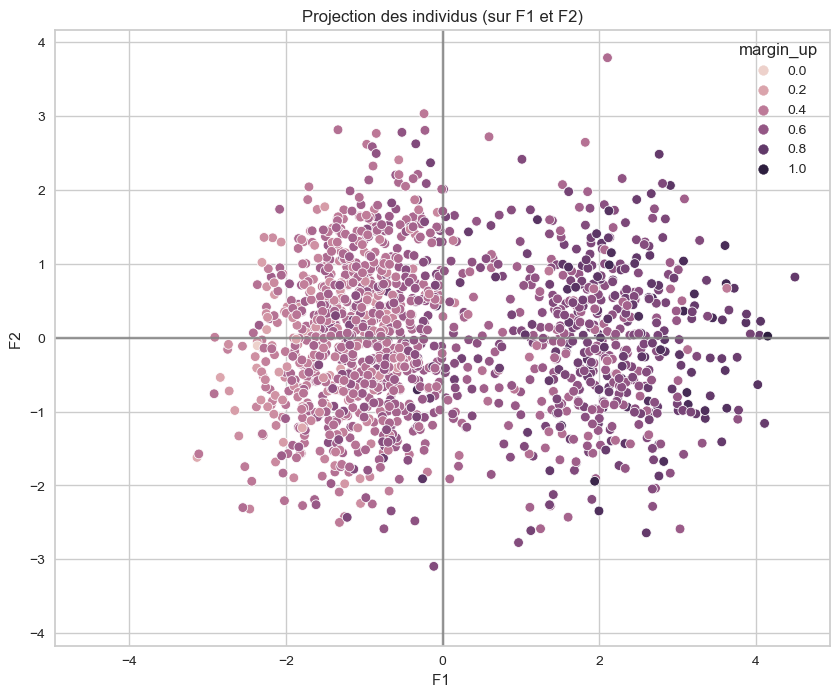

In [952]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df_test['margin_up'])

Essayons encore plus mieux avec F1 et F2 :

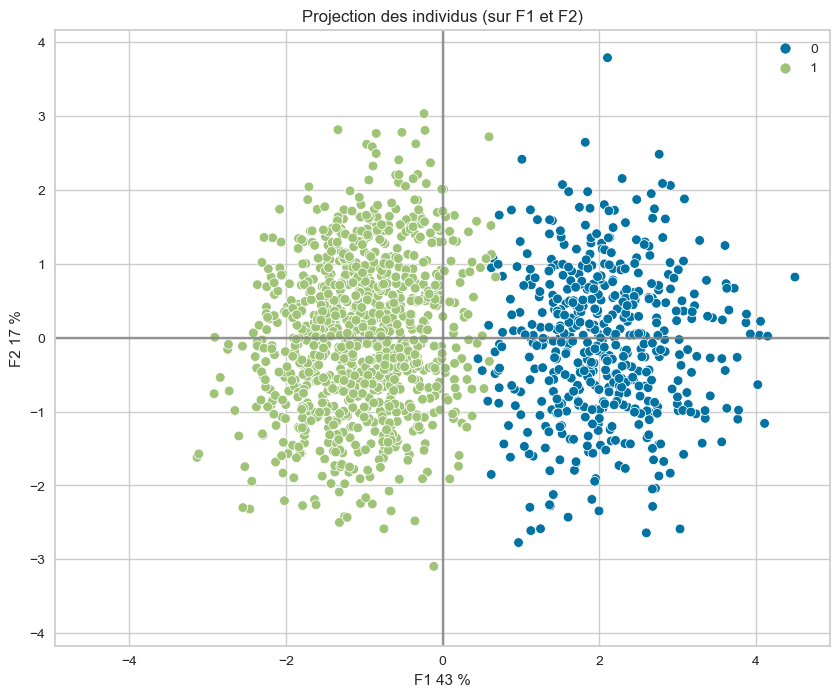

In [953]:
display_factorial_planes(X_proj,  
                         x_y=(0,1), 
                         clusters=labels, 
                         pca=pca, 
                         figsize=(10, 8), 
                         alpha=1 )     

Encore mieux, grace à plotly :

In [954]:
fig = px.scatter_3d(x=df_test.iloc[:,0], y=df_test.iloc[:,1], z=df_test.iloc[:, 2],
              color=labels)
fig.show()

### 3f- K-means

K-means avec les données mis à l'echelle x_train_scaled

In [955]:
# Utilisons K-means sur les données d'apprentissage mises à l'échelle

kmeans = KMeans(n_clusters=2)  # Spécifiez le nombre de clusters souhaité
kmeans.fit(x_train_scaled)

KMeans(n_clusters=2)

In [956]:
# Obtenir les centres des clusters

cluster_centers = kmeans.cluster_centers_

In [957]:
# Affichons les centres des clusters

print("Centres des clusters :")
for center in cluster_centers:
    print(center)

Centres des clusters :
[-0.19880262  0.58873137  0.68982063  1.09362251  0.83808332 -1.17670113]
[ 0.10197944 -0.30200053 -0.35385611 -0.56099368 -0.42991017  0.60361038]


In [958]:
cluster_centers

array([[-0.19880262,  0.58873137,  0.68982063,  1.09362251,  0.83808332,
        -1.17670113],
       [ 0.10197944, -0.30200053, -0.35385611, -0.56099368, -0.42991017,
         0.60361038]])

### Clusters

Regardons maintenant les clusters que nous avons obtenus.

Nous devons d'abord ré-entrainer un estimateur:

In [959]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train_scaled)

KMeans(n_clusters=2)

In [960]:
# Voici les clusters :

labels = kmeans.predict(X_scaled)

In [961]:
labels

array([1, 0, 0, ..., 1, 1, 1])

- ATTENTION

Ici, 0,1, sont à considérer comme une variable catégorielle cardinale. Il n'y a pas d'ordre entre les clusters.

Le cluster 0 n'est pas supérieur au cluster 1 par exemple. Considérez que c'est plus un id qu'une valeur.



Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres:

In [962]:
# Pour évaluer le modele on va faire un .predict() avec que les x_test

predictions = kmeans.predict(x_test_scaled)

In [963]:
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [964]:
from sklearn.metrics import confusion_matrix

print('confusion_martix:\n', confusion_matrix(y_test, predictions))

confusion_martix:
 [[  4 139]
 [304   3]]


In [965]:
tn,fp,fn,tp = confusion_matrix(y_test, predictions).ravel() # for flattened output(pour une sortie aplatie)
print(tn,fp,fn,tp)

4 139 304 3


On obtient la martix de confusion,

True négatif = 139;  False positif = 4;  False négative = 3;  True positive = 303;

Cette matrice de confusion est organisée en quatre quadrants. Les éléments sur la diagonale principale indiquent le nombre de prédictions correctes pour chaque classe. Dans ce cas, il y a eu 4 prédictions correctes pour la classe 0 et 3 prédictions correctes pour la classe 1.

Les éléments hors de la diagonale principale représentent les erreurs de classification. Dans ce cas, il y a eu 139 erreurs de classification où des exemples de la classe 0 ont été prédits comme appartenant à la classe 1, et il y a eu 304 erreurs de classification où des exemples de la classe 1 ont été prédits comme appartenant à la classe 0.

Cette matrice de confusion permet d'évaluer la performance globale du modèle de classification en fournissant des informations sur les faux positifs, les faux négatifs et les prédictions correctes. Dans ce cas, il semble que le modèle ait eu du mal à prédire les exemples de la classe 0, les classifiant à tort comme étant de la classe 1, tandis que la prédiction pour la classe 1 a été relativement faible, avec seulement 3 prédictions correctes.

In [966]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.01      0.03      0.02       143
           1       0.02      0.01      0.01       307

    accuracy                           0.02       450
   macro avg       0.02      0.02      0.02       450
weighted avg       0.02      0.02      0.01       450



On observe la precision, le recal, le f1-score et le support

accuracy est de 98% ce qui signifie le modele est elevé

Le rapport de classification indique une performance solide de notre modèle. Avec une exactitude (accuracy) de 0.98, notre modèle a réussi à prédire correctement la grande majorité des instances dans l'ensemble de test. Cela démontre une capacité élevée à généraliser et à distinguer les différentes classes.

### 4- CHARGEMENT DU FICHIER BILLETS_PRODUCTION 

In [967]:
# Importation des données billets_production

billets_production = pd.read_csv("billets_production.csv")

In [968]:
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [969]:
billets_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


In [970]:
# Convertir la colonne "id" en type chaîne de caractères (si elle ne l'est pas déjà)

billets_production['id'] = billets_production['id'].astype("category")

In [971]:
billets_production.set_index('id', inplace=True)

# Afficher le dataframe avec la nouvelle configuration de l'index

billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,171.87,104.17,104.13,6.00,3.31,112.09
A_3,172.00,104.58,104.29,4.99,3.39,111.57
A_4,172.49,104.55,104.34,4.44,3.03,113.20
A_5,171.65,103.63,103.56,3.77,3.16,113.33


In [972]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [973]:
def predict_with_logistic_regression(billets_production, scaler, model):
    data = billets_production.copy()
    X = scaler.transform(data)
    prediction = model.predict(X)
    data['prediction'] = prediction
    return data

In [974]:
# Appel de la fonction pour effectuer la prédiction

predicted_labels = predict_with_logistic_regression(billets_production, log_scaler, logmodel)

# Affichage des labels prédits

predicted_labels

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,0
A_2,171.87,104.17,104.13,6.00,3.31,112.09,0
A_3,172.00,104.58,104.29,4.99,3.39,111.57,0
A_4,172.49,104.55,104.34,4.44,3.03,113.20,1
A_5,171.65,103.63,103.56,3.77,3.16,113.33,1
